<h1 style="text-align: center;">Tikz Path</h1>

# Load tikzmagic extension

In [1]:
%load_ext tikzmagic

A path is a series of straight and curved line segments. It is specified following a `\path` command and the
specification must follow a special syntax.

# Example spec

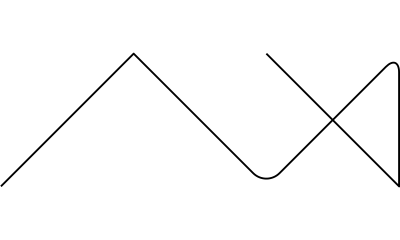

In [3]:
%%tikz -f svg

\draw (0,0) -- (1,1)
[rounded corners] -- (2,0) -- (3,1)
[sharp corners] -- (3,0) -- (2,1);

Using scoping by using curly braces.

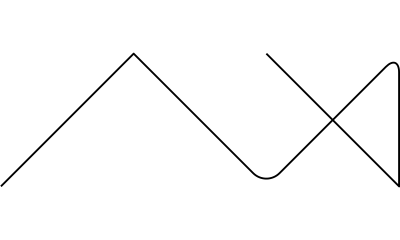

In [4]:
%%tikz -f svg

\draw (0,0) -- (1,1)
{[rounded corners] -- (2,0) -- (3,1)}
[sharp corners] -- (3,0) -- (2,1);

Some options only apply to the path as a whole. For example, the `color=` option for determining the color used for, say, drawing the path always applies to all parts of the path. If several different colors are given for different parts of the path, only the last one (on the outermost scope) "wins":

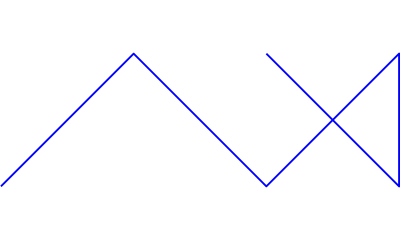

In [5]:
%%tikz -f svg

\draw (0,0) -- (1,1)
[color=red] -- (2,0) -- (3,1)
[color=blue] -- (3,0) -- (2,1);

Most options are of this type. In the above example, we would have had to "split up" the path into
several `\path` commands:

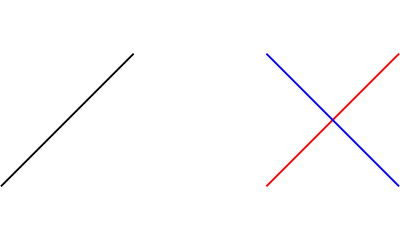

In [6]:
%%tikz -f svg
\draw (0,0) -- (1,1);
\draw [color=red] (2,0) -- (3,1);
\draw [color=blue] (3,0) -- (2,1);

- By default, the \path command does "nothing" with the path, it just "throws it away."

- Thus, if you write `\path(0,0)--(1,1);`, nothing is drawn in your picture.
  The only effect is that the area occupied by the picture is (possibly) enlarged so
  that the path fits inside the area.

- To actually "do" something with the path, an option like draw or fill must be given somewhere on the path.
  Commands like `\draw` do this implicitly.

Finally, it is also possible to give node specifications on a path. Such specifications can come at different
locations, but they are always allowed when a normal path operation could follow. A node specification
starts with node. Basically, the effect is to typeset the node's text as normal TEX text and to place it
at the "current location" on the path.

Note, however, that the nodes are not part of the path in any way. Rather, after everything has been
done with the path what is specified by the path options (like filling and drawing the path due to a fill
and a draw option somewhere in the `<specification>`), the nodes are added in a post-processing step.

# Every path

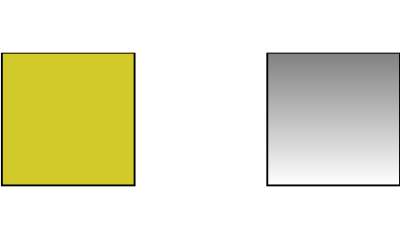

In [7]:
%%tikz -f svg

\begin{tikzpicture}[fill=yellow!80!black, every path/.style={draw}]

\fill (0,0) rectangle +(1,1);
\shade (2,0) rectangle +(1,1);

\end{tikzpicture}

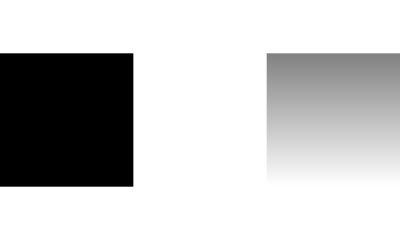

In [8]:
%%tikz -f svg

\fill (0,0) rectangle +(1,1);
\shade (2,0) rectangle +(1,1);

# Insert path

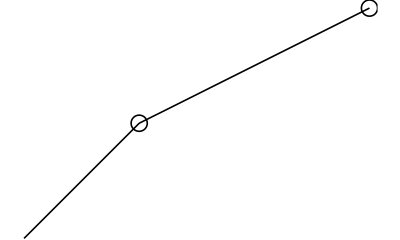

In [9]:
%%tikz -f svg
\tikz [c/.style={insert path={circle[radius=2pt]}}]
\draw (0,0) -- (1,1) [c] -- (3,2) [c];

Rectangle ???

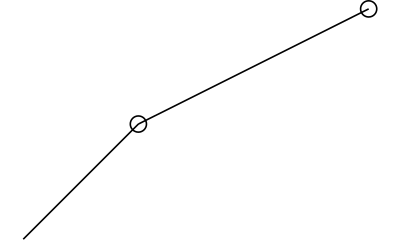

In [10]:
%%tikz -f svg

\draw (0,0) -- (1,1) circle[radius=2pt] -- (3,2) circle[radius=2pt];

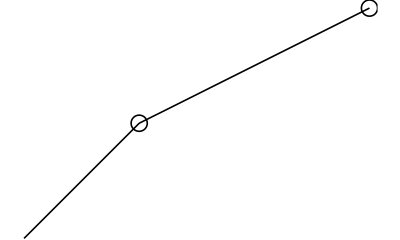

In [11]:
%%tikz -f svg
\tikz [c/.style={insert path={circle[radius=2pt,fill]}}]
\draw (0,0) -- (1,1) [c] -- (3,2) [c];

# Move-to operation

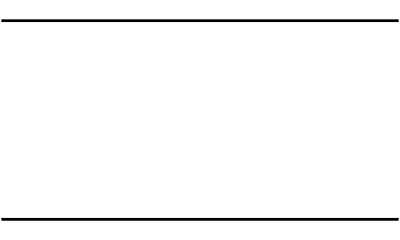

In [12]:
%%tikz -f svg
\draw (0,0) -- (2,0) (0,1) -- (2,1);

There is special coordinate called current subpath start that is always at the position of the last
move-to operation on the current path

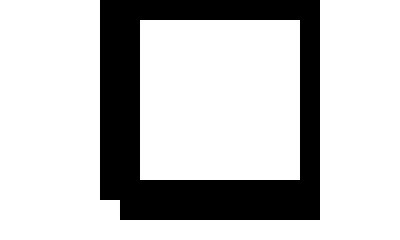

In [13]:
%%tikz -f svg
\tikz[line width=2mm]
\draw (0,0) -- (1,0) -- (1,1) -- (0,1) -- (current subpath start);

Note how in the above example the path is not closed (as --cycle would do). Rather, the line just starts
and ends at the origin without being a closed path

# Line to line operation

NOTE: not clear about how to use `\useasboundingbox` for the x coord

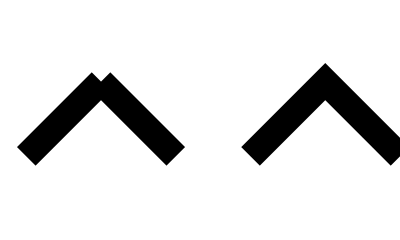

In [14]:
%%tikz -f svg
\begin{tikzpicture}[line width=10pt]
\draw (0,0) -- (1,1) (1,1) -- (2,0);
\draw (3,0) -- (4,1) -- (5,0);
\useasboundingbox (0.0,1.5);
\end{tikzpicture}

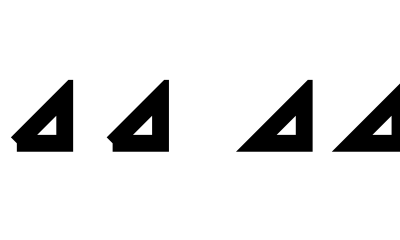

In [15]:
%%tikz -f svg

\begin{tikzpicture}[line width=10pt]
\draw (0,0) -- (1,1) -- (1,0) -- (0,0) (2,0) -- (3,1) -- (3,0) -- (2,0);
\draw (5,0) -- (6,1) -- (6,0) -- cycle (7,0) -- (8,1) -- (8,0) -- cycle;
\useasboundingbox (0,1.5); % make bounding box higher
\end{tikzpicture}

# Horizontal and vertical lines

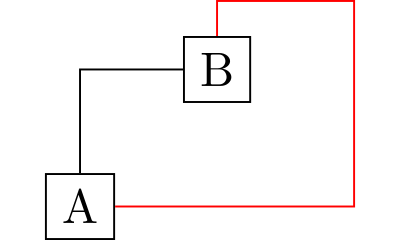

In [23]:
%%tikz -f svg

\draw (0,0) node (a) [draw] {A};
\draw (1,1) node (b) [draw] {B};

\draw (a.north) |- (b.west);
\draw [color=red] (a.east) -| (2,1.5) -| (b.north);

Instead of a coordinate you can also write cycle to close the path:

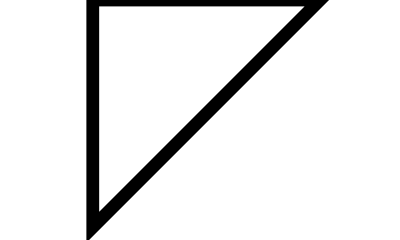

In [17]:
%%tikz -f svg

\begin{tikzpicture}[ultra thick]
\draw (0,0) -- (1,1) -| cycle;
\end{tikzpicture}

# Curve to

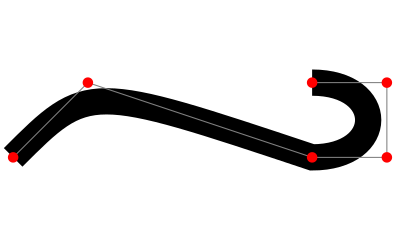

In [18]:
%%tikz -f svg

\draw [line width=10pt] (0,0) .. controls (1,1) .. (4,0)
                              .. controls (5,0) and (5,1) .. (4,1);

\draw [color=gray] (0,0) -- (1,1) -- (4,0) -- (5,0) -- (5,1) -- (4,1);
\fill [color=red] (0,0) circle[radius=2pt] -- (1,1) circle[radius=2pt];
\fill [color=red] (4,0) circle[radius=2pt] -- (5,0) circle[radius=2pt];
\fill [color=red] (5,1) circle[radius=2pt] -- (4,1) circle[radius=2pt];

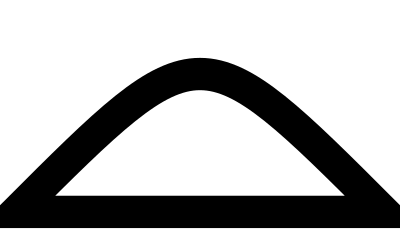

In [19]:
%%tikz -f svg

\draw [line width=5pt] (0,0) -- (2,0) .. controls (1,1) .. cycle;

# Rectangle operation

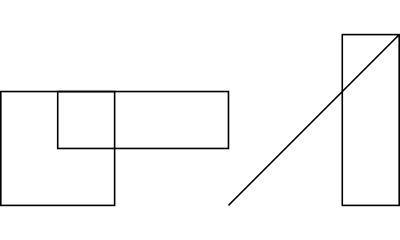

In [20]:
%%tikz -f svg

\draw (0,0) rectangle (1,1);
\draw (0.5,1) rectangle (2,0.5);
\draw (3,0) rectangle (3.5,1.5) -- (2,0);

# Rounding corners

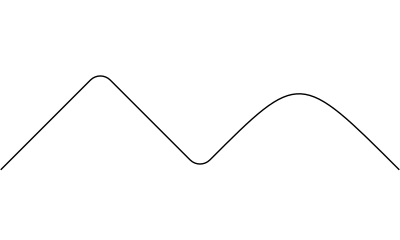

In [25]:
%%tikz -f svg

\draw [rounded corners] (0,0) -- (1,1) -- (2,0) .. controls (3,1) .. (4,0);

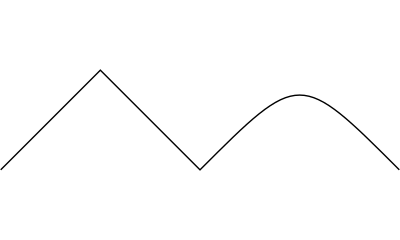

In [26]:
%%tikz -f svg

\draw (0,0) -- (1,1) -- (2,0) .. controls (3,1) .. (4,0);

The hinseti describes how big the corner is. Note that the hinseti is not scaled along if you use a scaling
option like scale=2.

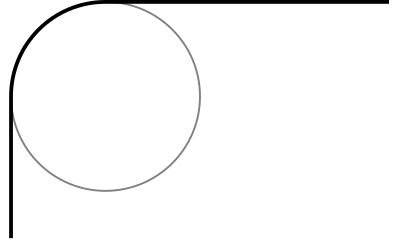

In [28]:
%%tikz -f svg

\draw[color=gray, very thin] (10pt,15pt) circle[radius=10pt];
\draw[rounded corners=10pt] (0,0) -- (0pt,25pt) -- (40pt,25pt);

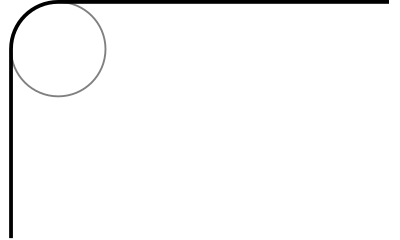

In [32]:
%%tikz -f svg

\draw[color=gray, very thin] (5pt,20pt) circle[radius=5pt];
\draw[rounded corners=5pt] (0,0) -- (0pt,25pt) -- (40pt,25pt);

You can switch the rounded corners on and off “in the middle of path” and different corners in the same
path can have different corner radii:

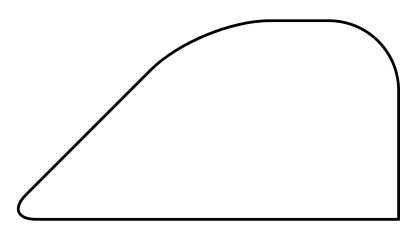

In [35]:
%%tikz -f svg
\draw (0,0) [rounded corners=10pt] -- (1,1) -- (2,1)
[sharp corners] -- (2,0)
[rounded corners=5pt] -- cycle;

You should be aware, that there are several pitfalls when using this option. First, the rounded corner
will only be an arc (part of a circle) if the angle is 90 ◦ . In other cases, the rounded corner will still be
round, but “not as nice.”

# Circle and ellipse

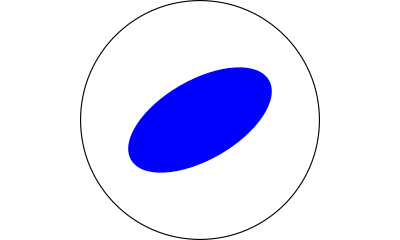

In [38]:
%%tikz -f svg

\draw (1,0) circle [radius=1.5];
\fill[color=blue] (1,0) circle [x radius=1cm, y radius=5mm, rotate=30];

It is possible to set the radius also in some enclosing scope, in this case the options can be left out (but
see the note below on what may follow):

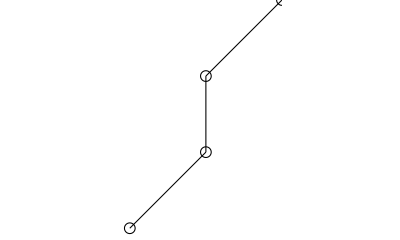

In [40]:
%%tikz -f svg

\begin{tikzpicture}[radius=2pt]
\draw (0,0) circle -- (1,1) circle circle -- ++(0,1) circle -- ++(1,1) circle;
\end{tikzpicture}

# Arc operation

The arc operation adds a part of an ellipse to the current path. The radii of the ellipse are given by
the values of x radius and y radius, which should be set in the hoptionsi. The arc will start at the
current point and will end at the end of the arc. The arc will start and end at angles computed from the
three keys start angle, end angle, and delta angle.

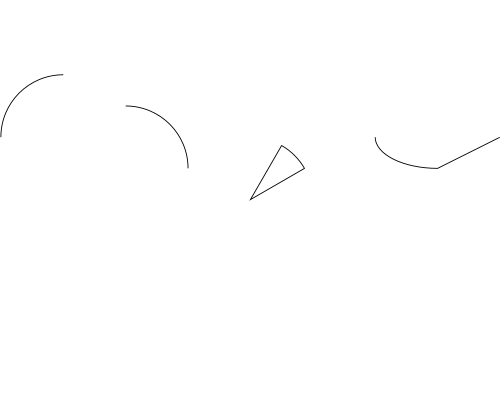

In [54]:
%%tikz -f svg --size 500,400

\begin{tikzpicture}[radius=1cm]

\draw (0,0) arc[start angle=180, end angle=90];
\draw (2,0.5) arc[start angle=90, delta angle=-90];
\draw (4,-1) -- +(30:1cm) arc [start angle=30, delta angle=30] -- cycle;

\draw (8,0) arc [start angle=0, end angle=270, x radius=1cm, y radius=5mm] -- cycle;

\end{tikzpicture}